<a href="https://colab.research.google.com/github/buvir/Cats-vs-Dogs-CNN-Image-Classifier-Deep-Learning-Essentials-/blob/main/Cats_vs_Dogs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enable GPU

In [1]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name:
    print("✓ GPU detected:", device_name)
else:
    print("✗ GPU not found. Go to Runtime > Change Runtime Type > Select GPU")


✓ GPU detected: /device:GPU:0


2. Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


3. Load CIFAR-10 Dataset (includes cats & dogs images)

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

x_train = x_train / 255.0
x_test = x_test / 255.0

print("Training samples:", x_train.shape)
print("Test samples:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Training samples: (50000, 32, 32, 3)
Test samples: (10000, 32, 32, 3)


4. Extract Only Cats (3) and Dogs (5)

In [4]:
cat_dog_train_idx = np.where((y_train == 3) | (y_train == 5))[0]
cat_dog_test_idx = np.where((y_test == 3) | (y_test == 5))[0]

x_train_cd = x_train[cat_dog_train_idx]
y_train_cd = (y_train[cat_dog_train_idx] == 5).astype(int)

x_test_cd = x_test[cat_dog_test_idx]
y_test_cd = (y_test[cat_dog_test_idx] == 5).astype(int)

print("Cat vs Dog Training Samples:", x_train_cd.shape)
print("Cat vs Dog Test Samples:", x_test_cd.shape)


Cat vs Dog Training Samples: (10000, 32, 32, 3)
Cat vs Dog Test Samples: (2000, 32, 32, 3)


Build CNN Model

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary: Cat(0) / Dog(1)
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,649 (1.36 MB)

 Trainable params: 355,649 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

6. Train the Model

In [6]:
history = model.fit(
    x_train_cd, y_train_cd,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5391 - loss: 0.6851 - val_accuracy: 0.6385 - val_loss: 0.6349
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6548 - loss: 0.6199 - val_accuracy: 0.6845 - val_loss: 0.5829
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7134 - loss: 0.5526 - val_accuracy: 0.7145 - val_loss: 0.5586
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7528 - loss: 0.5175 - val_accuracy: 0.7155 - val_loss: 0.5445
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7744 - loss: 0.4739 - val_accuracy: 0.7270 - val_loss: 0.5448
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7758 - loss: 0.4636 - val_accuracy: 0.7420 - val_loss: 0.5464
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8047 - loss: 0.4235 - val_accuracy: 0.7445 - val_loss: 0.5446
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8105 - loss: 0.4031 - val_accuracy: 0

7. Plot Accuracy & Loss

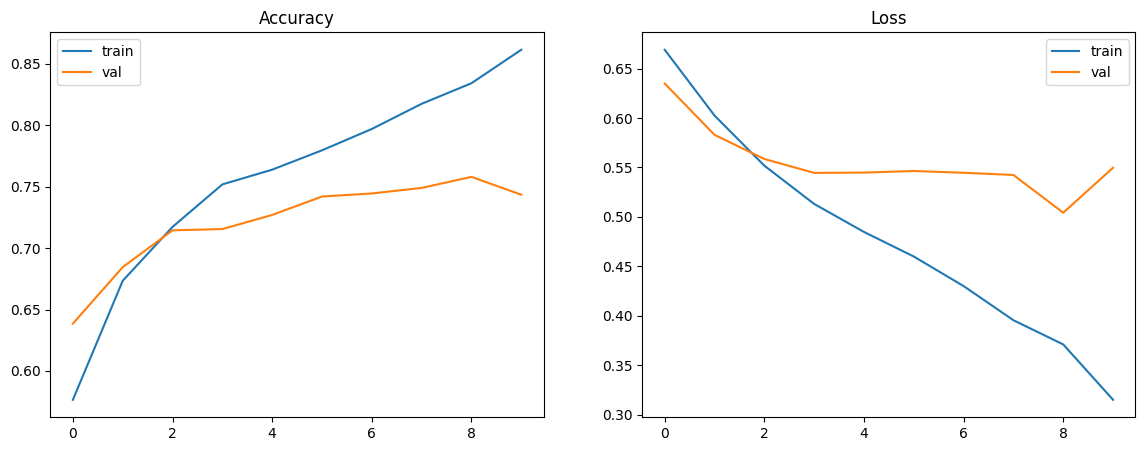

In [7]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("Loss")
plt.legend()

plt.show()


8. Test Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


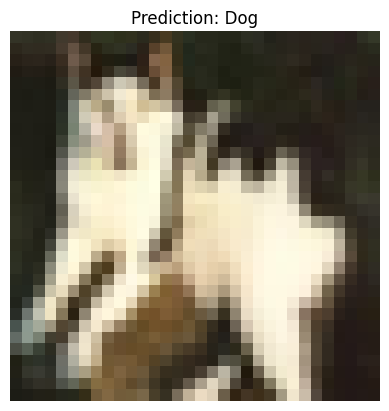

In [8]:
import random

idx = random.randint(0, len(x_test_cd)-1)
image = x_test_cd[idx]

prediction = model.predict(image.reshape(1,32,32,3))[0][0]
label = "Dog" if prediction >= 0.5 else "Cat"

plt.imshow(image)
plt.title(f"Prediction: {label}")
plt.axis("off")
plt.show()


9. Save Model (for GitHub)

In [9]:
model.save("cat_dog_cnn_model.h5")
print("Model saved!")


Model saved!


In [10]:
# Create model directory
import os
os.makedirs("model", exist_ok=True)

# Save model
model.save("model/cat_dog_cnn_model.h5")
print("Model saved at model/cat_dog_cnn_model.h5")


Model saved at model/cat_dog_cnn_model.h5


Save Training Accuracy & Loss Plots

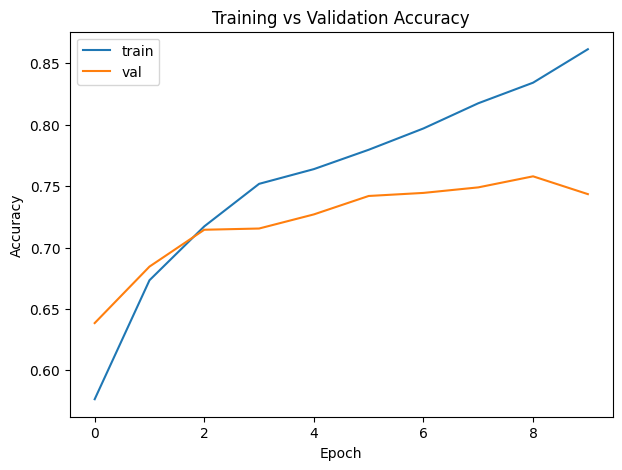

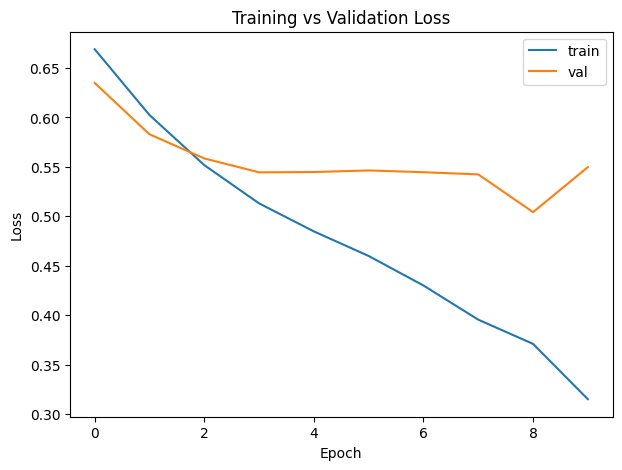

In [11]:
# Create assets directory
os.makedirs("assets", exist_ok=True)

# Plot Accuracy
plt.figure(figsize=(7,5))
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("assets/training_accuracy.png")
plt.show()

# Plot Loss
plt.figure(figsize=(7,5))
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig("assets/training_loss.png")
plt.show()


In [12]:
files.download("assets/training_accuracy.png")
files.download("assets/training_loss.png")


NameError: name 'files' is not defined

Save Sample Prediction Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


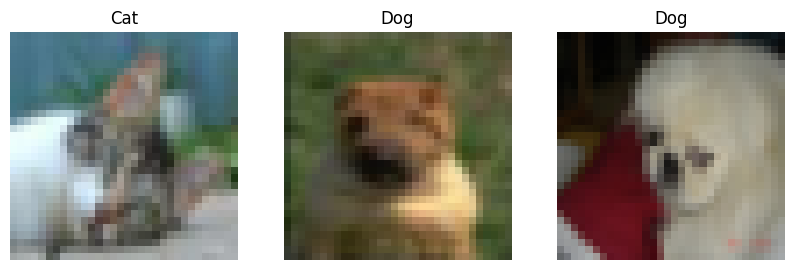

In [13]:
import random
plt.figure(figsize=(10,4))

for i in range(3):
    idx = random.randint(0, len(x_test_cd)-1)
    image = x_test_cd[idx]
    prediction = model.predict(image.reshape(1,32,32,3))[0][0]
    label = "Dog" if prediction >= 0.5 else "Cat"

    plt.subplot(1,3,i+1)
    plt.imshow(image)
    plt.title(label)
    plt.axis("off")
    # Save individual images
    plt.savefig(f"assets/sample_prediction_{i+1}.png")

plt.show()
